# Spatiotemporal Volatility

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
import seaborn as sns

import time
import os

import math
import scipy.stats as stats

In [32]:
enrolment = pd.read_csv('Featured Datasets/featured_enrolment.csv')
biometric = pd.read_csv('Featured Datasets/featured_biometric.csv')
demography = pd.read_csv('Featured Datasets/featured_demographic.csv')

os.makedirs('System Analyses', exist_ok=True)

print("Successfully loaded the Cleaned Datasets")

Successfully loaded the Cleaned Datasets


In [33]:
print(enrolment.info())
print('-'*50)
print(demography.info())
print('-'*50)
print(biometric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006007 entries, 0 to 1006006
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   date                     1006007 non-null  object 
 1   state                    1006007 non-null  object 
 2   district                 1006007 non-null  object 
 3   pincode                  1006007 non-null  int64  
 4   age_0_5                  1006007 non-null  int64  
 5   age_5_17                 1006007 non-null  int64  
 6   age_18+                  1006007 non-null  int64  
 7   total_enrolment          1006007 non-null  int64  
 8   day                      1006007 non-null  int64  
 9   month                    1006007 non-null  int64  
 10  day_name                 1006007 non-null  object 
 11  is_weekend               1006007 non-null  int64  
 12  region                   1006007 non-null  object 
 13  quarter                  1006007 non-null 

In [34]:
print(enrolment.head())
print('-'*50)
print(demography.head())
print('-'*50)
print(biometric.head())

         date          state          district  pincode  age_0_5  age_5_17  \
0  2025-03-02      Meghalaya  East Khasi Hills   793121       11        61   
1  2025-03-09      Karnataka   Bengaluru Urban   560043       14        33   
2  2025-03-09  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  2025-03-09  Uttar Pradesh           Aligarh   202133       62        29   
4  2025-03-09      Karnataka   Bengaluru Urban   560016       14        16   

   age_18+  total_enrolment  day  month day_name  is_weekend region  quarter  \
0       37              109    2      3   Sunday           1     NE        1   
1       39               86    9      3   Sunday           1  South        1   
2       12              123    9      3   Sunday           1  North        1   
3       15              106    9      3   Sunday           1  North        1   
4       21               51    9      3   Sunday           1  South        1   

   youth_ratio  is_high_intensity  youth_share  ad

In [35]:
dir_name = 'Temporal Volatility'
os.makedirs(dir_name, exist_ok=True)

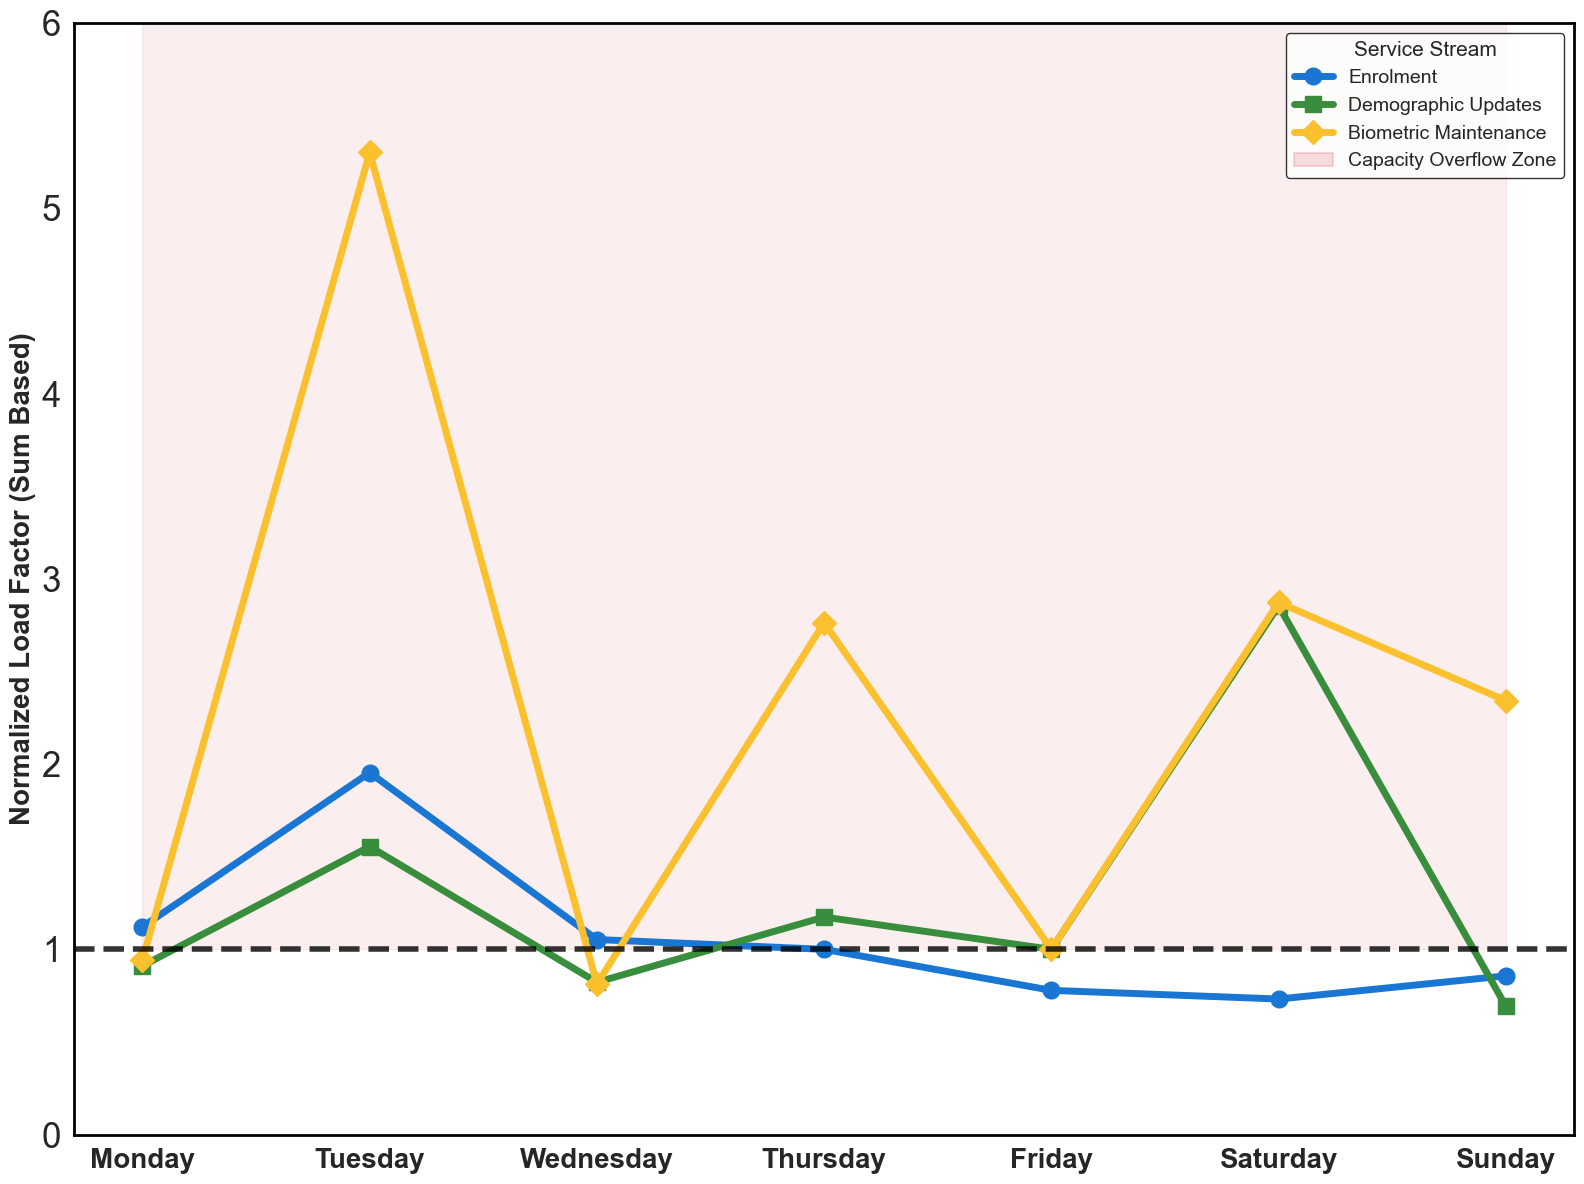

In [36]:
# 1. Aggregation & Normalization (Based on 4.94M record analysis)
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

en_daily = enrolment.groupby('day_name')['total_enrolment'].sum().reindex(week_order)
de_daily = demography.groupby('day_name')['total_updates'].sum().reindex(week_order)
bi_daily = biometric.groupby('day_name')['total_biometric'].sum().reindex(week_order)

mid_baseline = pd.concat([en_daily, de_daily, bi_daily], axis=1).loc[['Wednesday', 'Thursday', 'Friday']].median()

en_norm = en_daily / mid_baseline['total_enrolment']
de_norm = de_daily / mid_baseline['total_updates']
bi_norm = bi_daily / mid_baseline['total_biometric']

# 2. Visualization: The Skyscraper Perspective with Formal Borders
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--', 'grid.alpha': 0.4})

# Plotting the Skyscrapers
line1, = ax.plot(week_order, en_norm, marker='o', markersize=12, linewidth=5, label='Enrolment', color='#1976D2')
line2, = ax.plot(week_order, de_norm, marker='s', markersize=12, linewidth=5, label='Demographic Updates', color='#388E3C')
line3, = ax.plot(week_order, bi_norm, marker='D', markersize=12, linewidth=5, label='Biometric Maintenance', color='#FBC02D')

# --- THE STRETCH: Expanded scale to demonstrate lack of headroom ---
ax.set_ylim(0, 6.0) 

# --- CRITICAL LINE: Capacity Threshold at Y=1 ---
ax.axhline(1.0, color='black', linestyle='--', linewidth=4, alpha=0.8, label='Nominal Capacity Threshold')

# --- VISUAL BORDERS: Strengthening the Plot Perimeter ---
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# --- LEGEND HIGHLIGHT: Capacity Overflow Zone with thin border ---
overflow_patch = mpatches.Patch(
    facecolor='#D32F2F', 
    alpha=0.15, 
    label='Capacity Overflow Zone', 
    linewidth=1.5, 
    edgecolor='#B71C1C'
)

ax.fill_between(week_order, 1.0, 6.0, color='#D32F2F', alpha=0.08)

# Final Polishing
# ax.set_title('Infrastructure Stress Test: Temporal Skyscraper Analysis', fontsize=26, fontweight='black', pad=40)
ax.set_ylabel('Normalized Load Factor (Sum Based)', fontsize=20, fontweight='bold')
# ax.set_xlabel('Weekly Operational Cycle', fontsize=18, fontweight='bold', labelpad=15)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=25)

# --- UPDATED LEGEND: Positioned Top-Right with the Brazier patch included ---
ax.legend(
    handles=[line1, line2, line3, overflow_patch], 
    frameon=True, 
    fontsize=14, 
    loc='upper right', 
    title='Service Stream', 
    title_fontsize=15,
    edgecolor='black'
)

plt.tight_layout()

# Save for the Report
plt.savefig(f'{dir_name}/Temporal_Analysis_Sum.png', dpi=300)
plt.show()

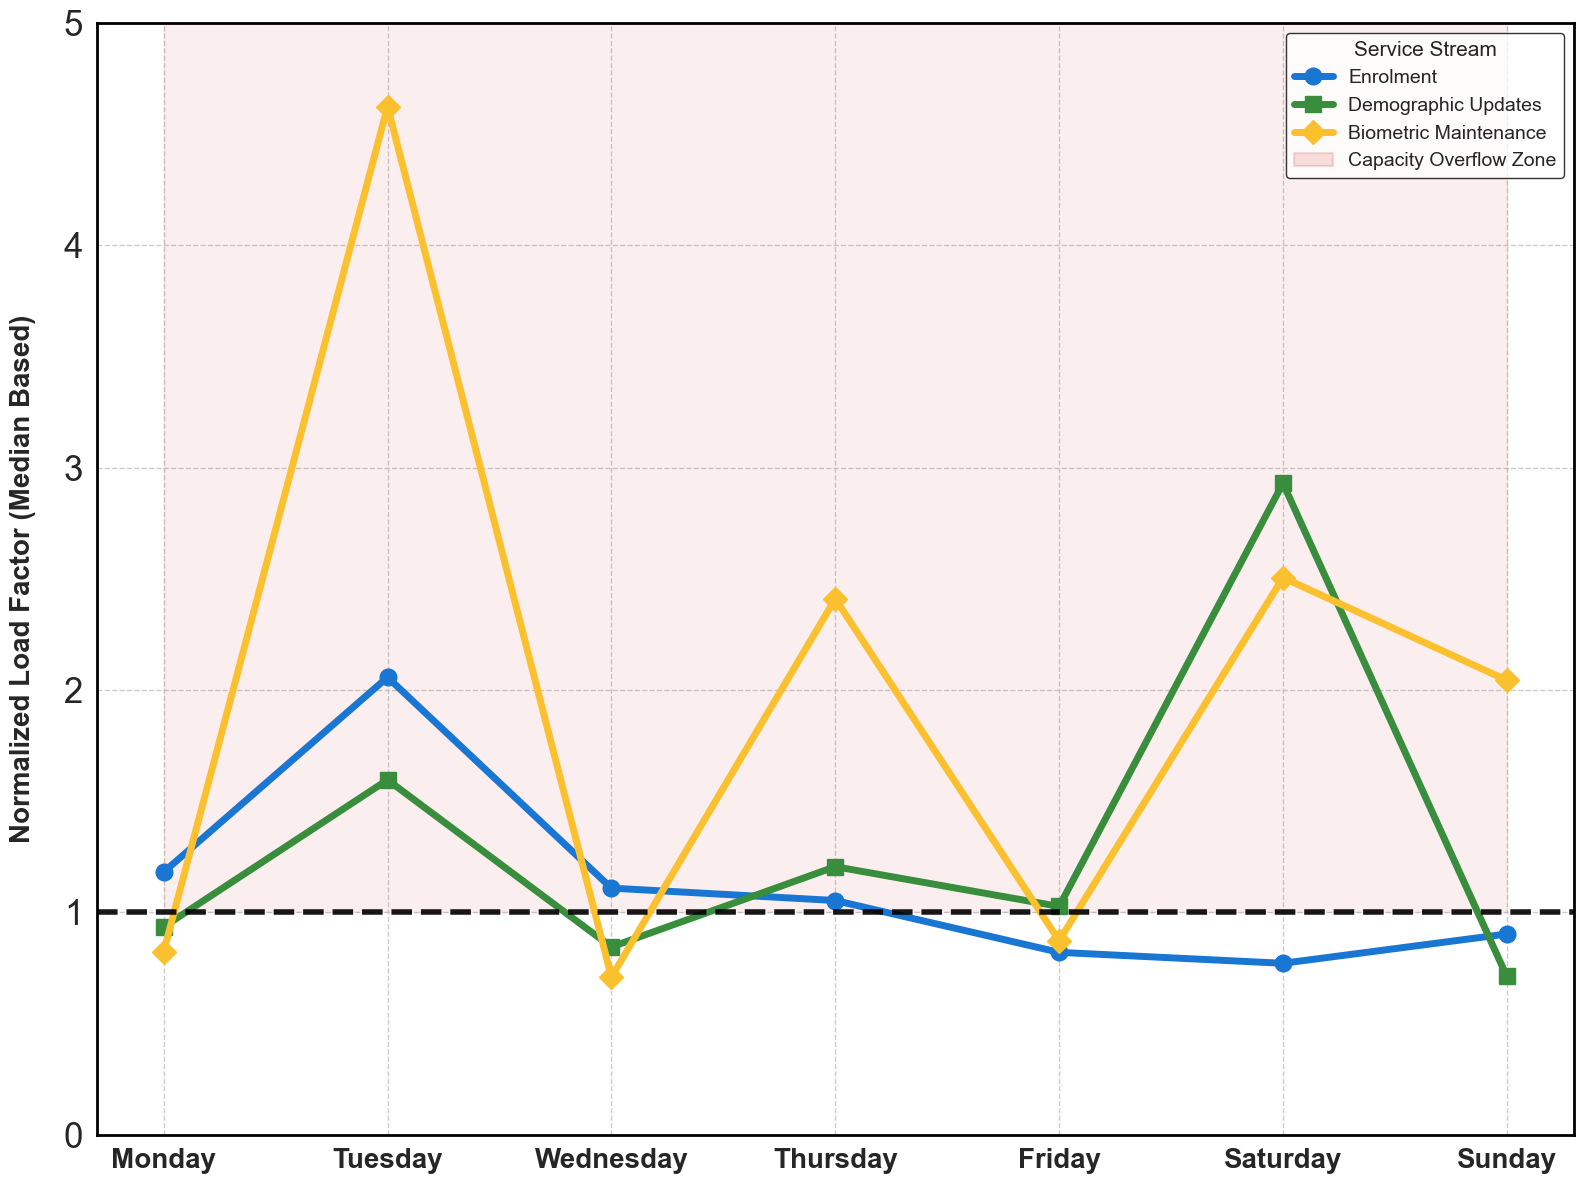

In [37]:
# 1. 'Steady-State' Logic Implementation
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
midweek_days = ['Wednesday', 'Thursday', 'Friday']

# Logic: Calculating the median of individual daily totals for the 1.0 baseline
# Grouping by 'date' first ensures we find the 'True Typical Day' across history
en_baseline = enrolment[enrolment['day_name'].isin(midweek_days)].groupby('date')['total_enrolment'].sum().median()
de_baseline = demography[demography['day_name'].isin(midweek_days)].groupby('date')['total_updates'].sum().median()
bi_baseline = biometric[biometric['day_name'].isin(midweek_days)].groupby('date')['total_biometric'].sum().median()

# Aggregating total volume by day name for the final trend lines
en_daily = enrolment.groupby('day_name')['total_enrolment'].sum().reindex(week_order)
de_daily = demography.groupby('day_name')['total_updates'].sum().reindex(week_order)
bi_daily = biometric.groupby('day_name')['total_biometric'].sum().reindex(week_order)

# Normalizing using the Steady-State Baseline 
# (Dividing by the number of weeks to compare Daily Aggregates to Daily Medians)
num_weeks = len(enrolment['date'].unique()) / 7
en_norm = (en_daily / num_weeks) / en_baseline
de_norm = (de_daily / num_weeks) / de_baseline
bi_norm = (bi_daily / num_weeks) / bi_baseline

# 2. Visualization: The Skyscraper Perspective with Formal Borders
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--', 'grid.alpha': 0.4})

# Plotting the Skyscrapers
line1, = ax.plot(week_order, en_norm, marker='o', markersize=12, linewidth=5, label='Enrolment', color='#1976D2')
line2, = ax.plot(week_order, de_norm, marker='s', markersize=12, linewidth=5, label='Demographic Updates', color='#388E3C')
line3, = ax.plot(week_order, bi_norm, marker='D', markersize=12, linewidth=5, label='Biometric Maintenance', color='#FBC02D')

# --- THE STRETCH: Expanded scale to demonstrate lack of headroom ---
ax.set_ylim(0, 5.0) 

# --- CRITICAL LINE: Dotted Capacity Threshold at Y=1 ---
ax.axhline(1.0, color='black', linestyle='--', linewidth=4, alpha=0.9, label='Nominal Capacity Threshold')

# --- VISUAL BORDERS: Strengthening the Plot Perimeter ---
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# --- LEGEND HIGHLIGHT: Capacity Overflow Zone with Brazier border ---
overflow_patch = mpatches.Patch(
    facecolor='#D32F2F', 
    alpha=0.15, 
    label='Capacity Overflow Zone', 
    linewidth=1.5, 
    edgecolor='#B71C1C'
)

ax.fill_between(week_order, 1.0, 5.0, color='#D32F2F', alpha=0.08)

# Final Polishing
ax.set_ylabel('Normalized Load Factor (Median Based)', fontsize=20, fontweight='bold', labelpad=20)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=25)

# --- FINAL LEGEND: Positioned Top-Right ---
ax.legend(
    handles=[line1, line2, line3, overflow_patch], 
    frameon=True, 
    fontsize=14, 
    loc='upper right', 
    title='Service Stream', 
    title_fontsize=15,
    edgecolor='black'
)

plt.tight_layout()

# Save for the Report
plt.savefig(f'{dir_name}/Temporal_Analysis_Median.png', dpi=300)
plt.show()

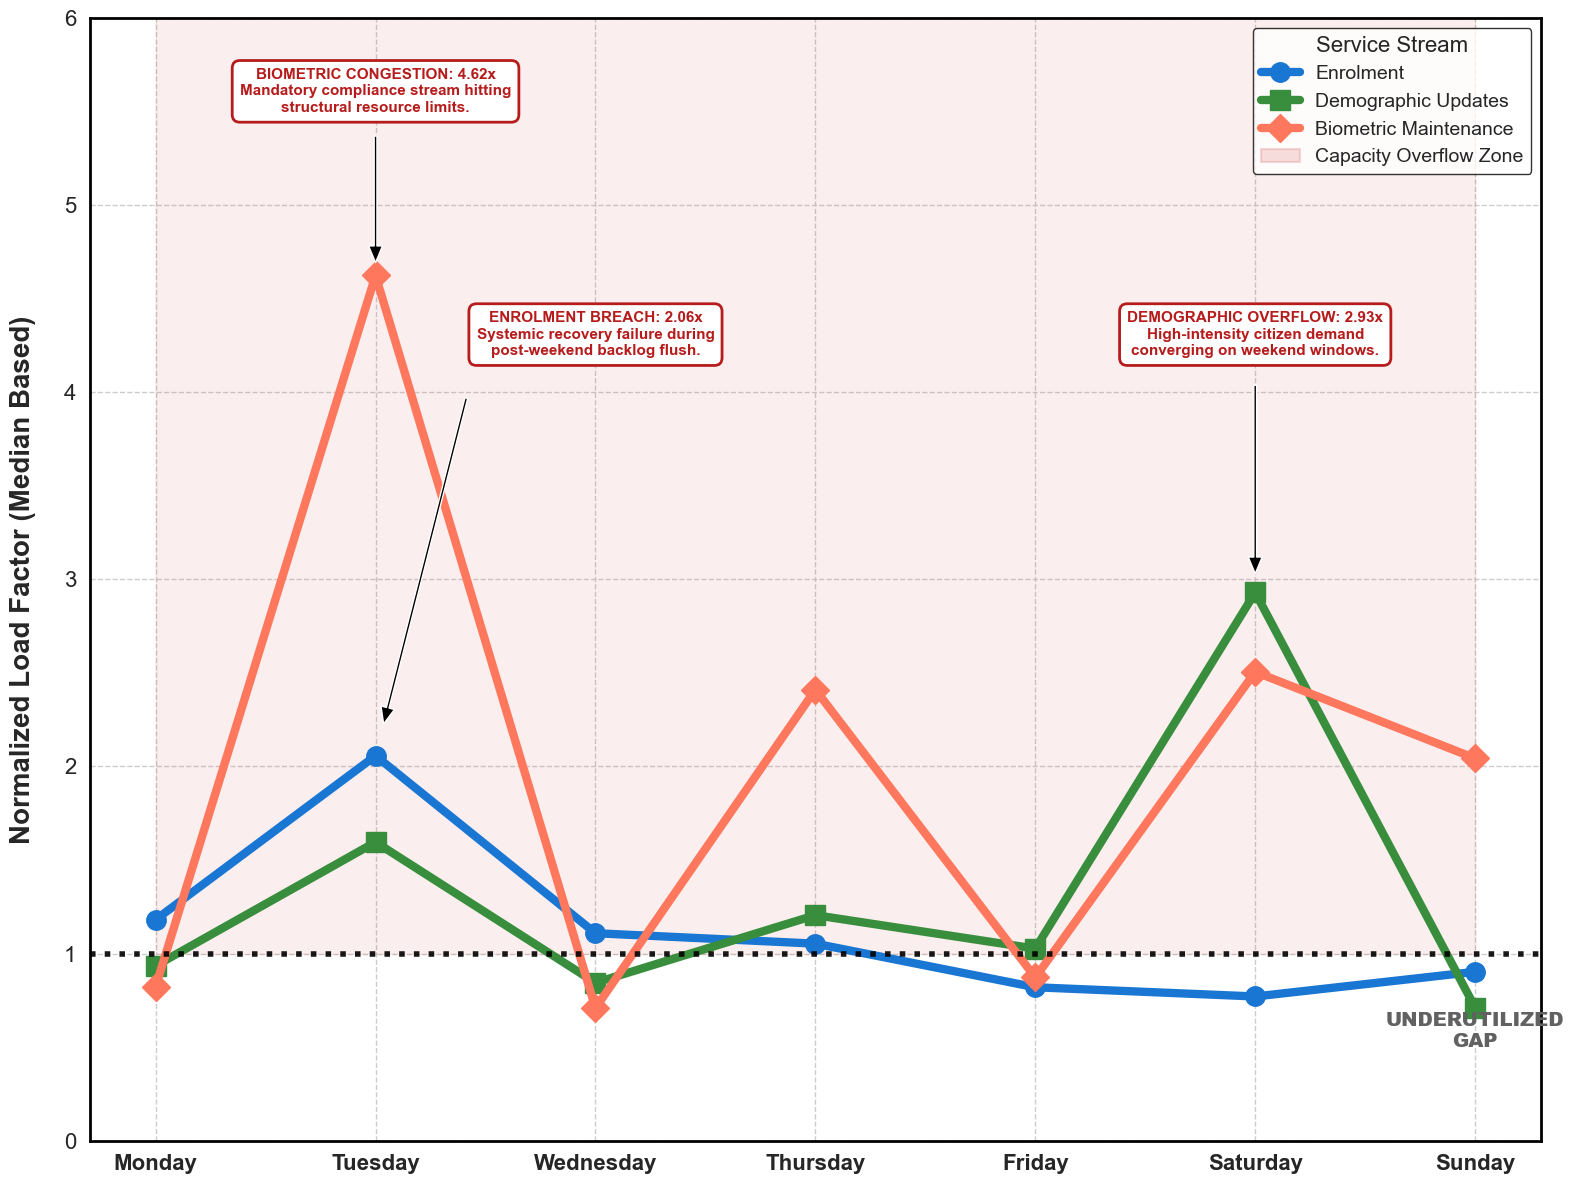

In [38]:
# 1. Steady-State Baseline Logic (Option B)
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
midweek_days = ['Wednesday', 'Thursday', 'Friday']

# Baseline calculation: Median of individual daily totals
en_baseline = enrolment[enrolment['day_name'].isin(midweek_days)].groupby('date')['total_enrolment'].sum().median()
de_baseline = demography[demography['day_name'].isin(midweek_days)].groupby('date')['total_updates'].sum().median()
bi_baseline = biometric[biometric['day_name'].isin(midweek_days)].groupby('date')['total_biometric'].sum().median()

# Weekly aggregates for plotting
en_daily = enrolment.groupby('day_name')['total_enrolment'].sum().reindex(week_order)
de_daily = demography.groupby('day_name')['total_updates'].sum().reindex(week_order)
bi_daily = biometric.groupby('day_name')['total_biometric'].sum().reindex(week_order)

# Normalize by Steady-State units
num_weeks = len(enrolment['date'].unique()) / 7
en_norm = (en_daily / num_weeks) / en_baseline
de_norm = (de_daily / num_weeks) / de_baseline
bi_norm = (bi_daily / num_weeks) / bi_baseline

# 2. Visualization
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--', 'grid.alpha': 0.4})

# Plotting the Skyscrapers
line1, = ax.plot(week_order, en_norm, marker='o', markersize=14, linewidth=6, label='Enrolment', color='#1976D2')
line2, = ax.plot(week_order, de_norm, marker='s', markersize=14, linewidth=6, label='Demographic Updates', color='#388E3C')
line3, = ax.plot(week_order, bi_norm, marker='D', markersize=14, linewidth=6, label='Biometric Maintenance', color='#FF775C')

# --- INFRASTRUCTURE LIMITS ---
ax.set_ylim(0, 6.0) 
ax.axhline(1.0, color='black', linestyle=':', linewidth=4, alpha=0.9, label='Nominal Capacity Threshold')

# Overflow Zone
overflow_patch = mpatches.Patch(facecolor='#D32F2F', alpha=0.15, label='Capacity Overflow Zone', 
                                linewidth=1.5, edgecolor='#B71C1C')
ax.fill_between(week_order, 1.0, 6.0, color='#D32F2F', alpha=0.08)

# --- SYSTEMIC ANNOTATIONS (The "Comments") ---

ax.annotate(f'ENROLMENT BREACH: {en_norm["Tuesday"]:.2f}x\nSystemic recovery failure during\npost-weekend backlog flush.', 
             xy=('Tuesday', en_norm['Tuesday']), xytext=('Wednesday', 4.2),
             arrowprops=dict(facecolor='black', shrink=0.08, width=2, headwidth=10),
             ha='center', fontsize=11, fontweight='bold', color='#B71C1C',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="#B71C1C", lw=2))

# Saturday Peak: Demography
ax.annotate(f'DEMOGRAPHIC OVERFLOW: {de_norm["Saturday"]:.2f}x\nHigh-intensity citizen demand\nconverging on weekend windows.', 
             xy=('Saturday', de_norm['Saturday']), xytext=('Saturday', 4.2),
             arrowprops=dict(facecolor='black', shrink=0.08, width=2, headwidth=10),
             ha='center', fontsize=11, fontweight='bold', color='#B71C1C',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="#B71C1C", lw=2))

# Saturday Peak: Biometric (Dynamic location based on data)
bi_peak_day = bi_norm.idxmax()
ax.annotate(f'BIOMETRIC CONGESTION: {bi_norm[bi_peak_day]:.2f}x\nMandatory compliance stream hitting\nstructural resource limits.', 
             xy=(bi_peak_day, bi_norm[bi_peak_day]), xytext=(bi_peak_day, 5.5),
             arrowprops=dict(facecolor='black', shrink=0.08, width=2, headwidth=10),
             ha='center', fontsize=11, fontweight='bold', color='#B71C1C',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="#B71C1C", lw=2))
# Sunday Note: Resource Idle
ax.text('Sunday', 0.5, 'UNDERUTILIZED\nGAP', color='#616161', fontweight='black', ha='center', fontsize=14)

# Final Polishing
ax.set_ylabel('Normalized Load Factor (Median Based)', fontsize=20, fontweight='bold', labelpad=20)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)

# Borders
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# Legend
ax.legend(handles=[line1, line2, line3, overflow_patch], frameon=True, fontsize=14, 
          loc='upper right', title='Service Stream', title_fontsize=16, edgecolor='black')

plt.tight_layout()
plt.savefig(f'{dir_name}/Temporal_Pillar_Annotated.png', dpi=300)
plt.show()

In [39]:
# Create directory for Pillar II
dir_name = 'Spatial Stress'
os.makedirs(dir_name, exist_ok=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_39952\3066961044.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


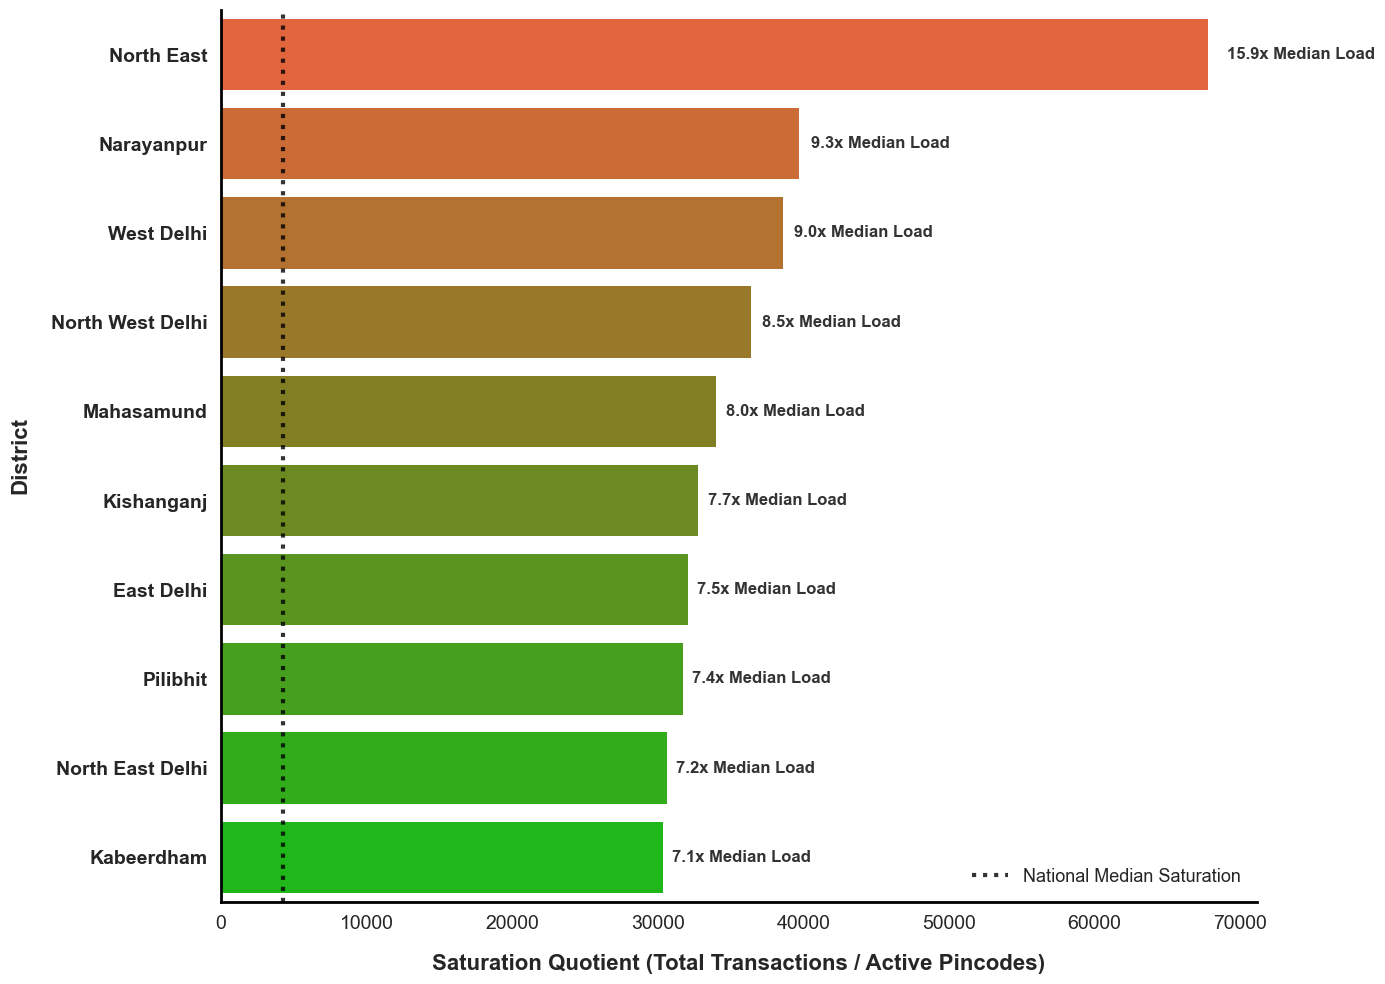

In [40]:
# Set style, but keep axes enabled for later customization
sns.set_theme(style="white", rc={'axes.grid': False})

# Custom Gradient Palette: Transition from yellowish-green to deep orange
# This signifies moving from "High Load" to "Critical Saturation"
STRESS_PALETTE = sns.color_palette("blend:#FF5722,#07D100", n_colors=10)

# --- 2. DATA AGGREGATION & METRIC CALCULATION ---
# (Same sound logic as before)
vol_en = enrolment.groupby('district')['total_enrolment'].sum()
vol_de = demography.groupby('district')['total_updates'].sum()
vol_bi = biometric.groupby('district')['total_biometric'].sum()

# Proxy for infrastructure density: Unique Pincodes
active_pincodes = enrolment.groupby('district')['pincode'].nunique()

# Merging into Stress Matrix
stress_df = pd.DataFrame({
    'Total_Volume': vol_en.add(vol_de, fill_value=0).add(vol_bi, fill_value=0),
    'Active_Pincodes': active_pincodes
}).dropna()

# Calculating Saturation Quotient (Load per neighborhood unit)
stress_df['Saturation_Quotient'] = stress_df['Total_Volume'] / stress_df['Active_Pincodes']

# Identifying the National Baseline (Steady-State Median Saturation)
national_median = stress_df['Saturation_Quotient'].median()
top_10_crisis = stress_df.sort_values(by='Saturation_Quotient', ascending=False).head(10)

# --- 3. VISUALIZATION ---
fig, ax = plt.subplots(figsize=(14, 10))

# Horizontal Bar Plot with NEW Palette
sns.barplot(
    data=top_10_crisis,
    x='Saturation_Quotient',
    y=top_10_crisis.index,
    palette=STRESS_PALETTE,
    edgecolor='none', # Keep bars clean
    ax=ax
)

# Reference Line: National Median Capacity
ax.axvline(national_median, color='black', linestyle=':', linewidth=3, alpha=0.8, label='National Median Saturation')

# DATA-DRIVEN ANNOTATIONS
for i, (district, row) in enumerate(top_10_crisis.iterrows()):
    multiplier = row['Saturation_Quotient'] / national_median
    # Offset text slightly for readability
    ax.text(
        row['Saturation_Quotient'] * 1.02, i, 
        f"{multiplier:.1f}x Median Load", 
        va='center', fontsize=12, fontweight='bold', color='#333333'
    )

# --- REFINED AESTHETICS: AXIS BORDERS ONLY ---
# ax.set_title('Pillar II: Spatial Stress Matrix\nGeographic Saturation & Infrastructure Deficits', 
#             fontsize=24, fontweight='black', pad=35, loc='left')
ax.set_xlabel('Saturation Quotient (Total Transactions / Active Pincodes)', fontsize=16, fontweight='bold', labelpad=15)
ax.set_ylabel('District', fontsize=16, fontweight='bold', labelpad=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')

# Keep only the left and bottom spines ("L-shape" border)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Reinforce the remaining borders
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_edgecolor('black')
ax.spines['bottom'].set_edgecolor('black')

plt.legend(loc='lower right', frameon=False, fontsize=13)
plt.tight_layout()

# Save for Report
plt.savefig(f'{dir_name}/Spatial_Saturation.png', dpi=300, bbox_inches='tight')
plt.show()

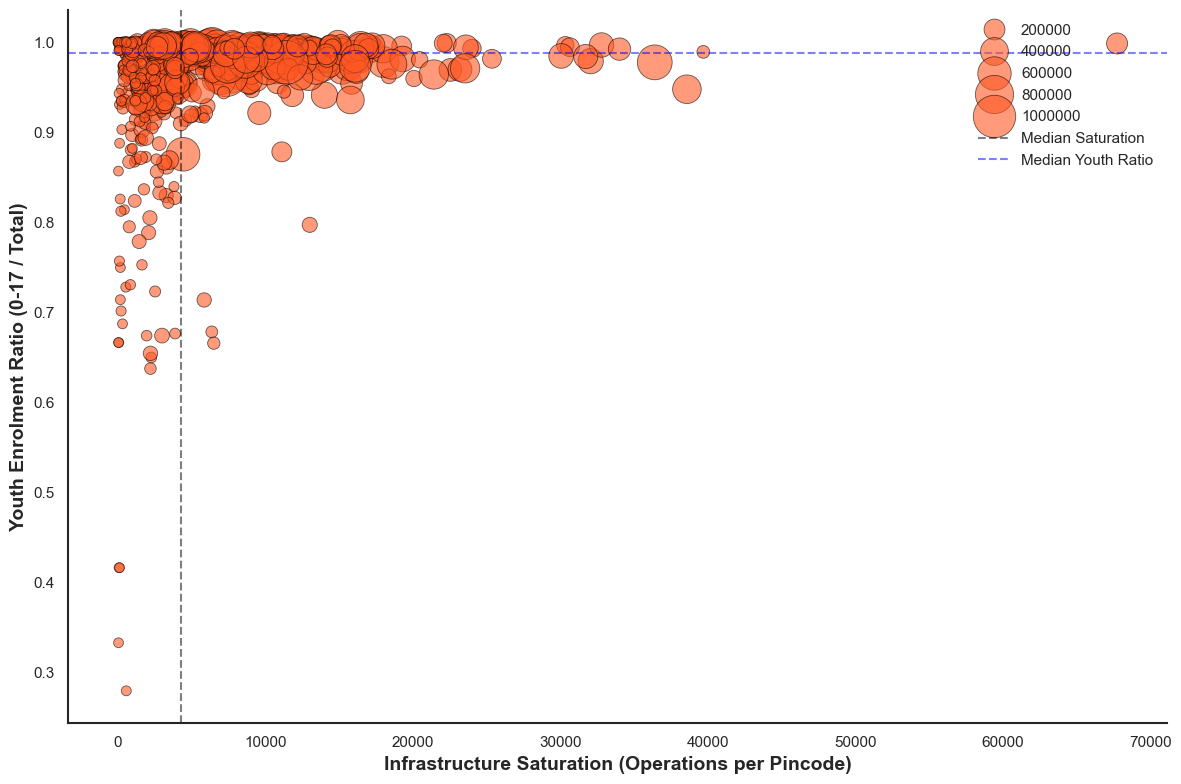

In [41]:
# --- 1. AGGREGATE SPATIAL STRESS (Fixing the NameError) ---
# Summing operational streams by district
vol_en = enrolment.groupby('district')['total_enrolment'].sum()
vol_de = demography.groupby('district')['total_updates'].sum()
vol_bi = biometric.groupby('district')['total_biometric'].sum()

# Proxy for infrastructure density: Unique Pincodes
active_pincodes = enrolment.groupby('district')['pincode'].nunique()

# Build the base stress dataframe
stress_data = pd.DataFrame({
    'Total_Volume': vol_en.add(vol_de, fill_value=0).add(vol_bi, fill_value=0),
    'Active_Pincodes': active_pincodes
}).dropna()

# Calculate Saturation Quotient
stress_data['Saturation_Quotient'] = stress_data['Total_Volume'] / stress_data['Active_Pincodes']
national_median = stress_data['Saturation_Quotient'].median()

# --- 2. CALCULATE YOUTH ENROLMENT EFFICIENCY ---
enrolment['total_youth'] = enrolment['age_0_5'] + enrolment['age_5_17']
youth_stats = enrolment.groupby('district').agg({
    'total_youth': 'sum',
    'total_enrolment': 'sum'
})
youth_stats['youth_efficiency'] = youth_stats['total_youth'] / youth_stats['total_enrolment']

# --- 3. MERGE & VISUALIZE ---
deep_analysis = stress_data.join(youth_stats[['youth_efficiency']])

plt.figure(figsize=(12, 8))
sns.set_style("white")

# Scatter plot representing the "Pressure vs. Access" relationship
sns.scatterplot(
    data=deep_analysis,
    x='Saturation_Quotient',
    y='youth_efficiency',
    size='Total_Volume',
    sizes=(50, 1000),
    alpha=0.6,
    color='#FF5722', 
    edgecolor='black'
)

# Reference Lines: Establishing the "Healthy Median"
plt.axvline(national_median, color='black', linestyle='--', alpha=0.5, label='Median Saturation')
plt.axhline(deep_analysis['youth_efficiency'].median(), color='blue', linestyle='--', alpha=0.5, label='Median Youth Ratio')

# Professional Labeling
plt.xlabel('Infrastructure Saturation (Operations per Pincode)', fontsize=14, fontweight='bold')
plt.ylabel('Youth Enrolment Ratio (0-17 / Total)', fontsize=14, fontweight='bold')

# Styling: L-frame (No top/right borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig(f'{dir_name}/Spatial_Stress_Youth_Correlation.png', dpi=300)
plt.show()

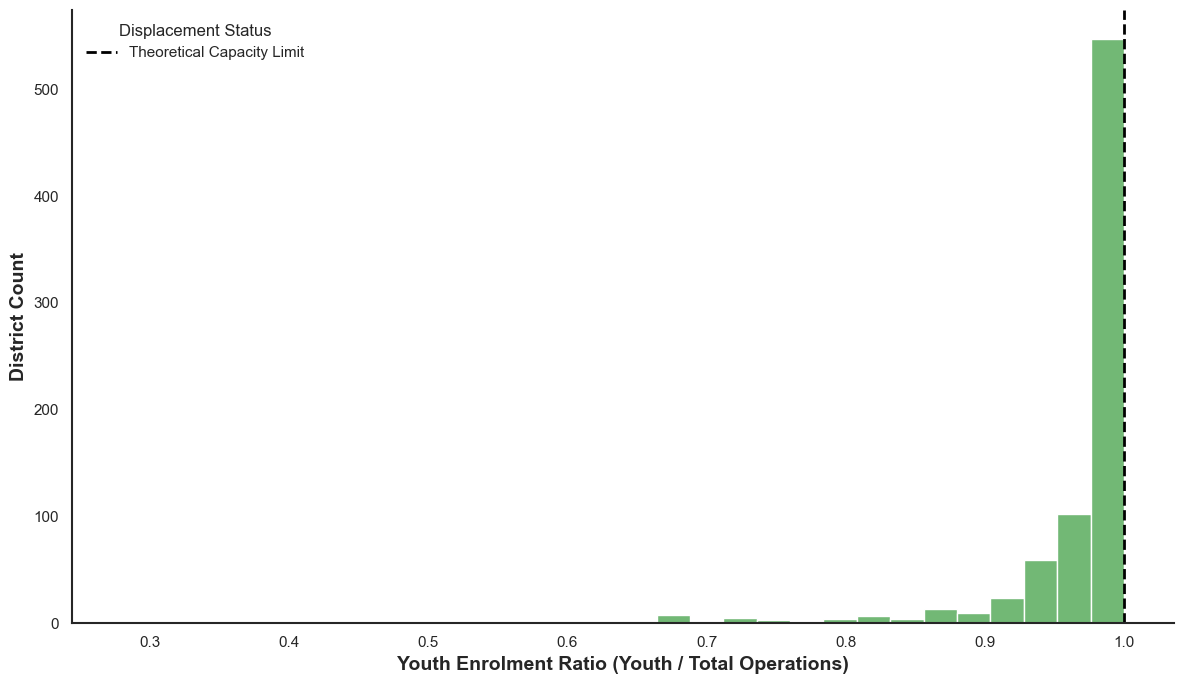

In [42]:
dir_name = 'Demographic Displacement'
os.makedirs(dir_name, exist_ok=True)
sns.set_theme(style="white")

# --- 2. CALCULATE DISPLACEMENT METRICS ---
# Calculate Youth Enrolment (0-17) vs. Total
enrolment['youth_count'] = enrolment['age_0_5'] + enrolment['age_5_17']
district_stats = enrolment.groupby('district').agg({
    'youth_count': 'sum',
    'total_enrolment': 'sum'
})

# Youth Enrolment Ratio
district_stats['youth_ratio'] = district_stats['youth_count'] / district_stats['total_enrolment']

# Classify Districts based on the "Geographic Displacement" Logic
def classify_displacement(ratio):
    if ratio > 1.0:
        return 'Service Sink (Inflow)'
    elif ratio > 0.5:
        return 'Standard Service'
    else:
        return 'Service Void (Outflow)'

district_stats['displacement_category'] = district_stats['youth_ratio'].apply(classify_displacement)

# --- 3. VISUALIZING THE DISPLACEMENT SPECTRUM ---
plt.figure(figsize=(12, 7))

# Histogram to show the distribution of ratios across all districts
ax = sns.histplot(
    data=district_stats, 
    x='youth_ratio', 
    hue='displacement_category',
    palette={'Service Sink (Inflow)': '#E65100', 'Standard Service': '#43A047', 'Service Void (Outflow)': '#1E88E5'},
    multiple="stack",
    bins=30,
    edgecolor='white'
)

# Critical Boundary Line at 1.0
plt.axvline(1.0, color='black', linestyle='--', linewidth=2, label='Theoretical Capacity Limit')

# Formatting
#plt.title('Pillar III: Demographic Displacement Spectrum\nIdentifying Regional Service Sinks (Ratios > 1.0)', 
#          fontsize=20, fontweight='black', pad=25, loc='left')
plt.xlabel('Youth Enrolment Ratio (Youth / Total Operations)', fontsize=14, fontweight='bold')
plt.ylabel('District Count', fontsize=14, fontweight='bold')

# Clean L-Frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.legend(title='Displacement Status', frameon=False)
plt.tight_layout()

# Save for Report
plt.savefig(f'{dir_name}/Demographic_Displacement_Spectrum.png', dpi=300)
plt.show()